In [ ]:
from google.colab import files
uploaded = files.upload()

Saving geo.csv to geo.csv


Import the necessary Libraries to implement PCA

In [ ]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

write a code to read and understand the dataset

In [ ]:
dataset = pd.read_csv('geo.csv')
print("Shape of the dataset:", dataset.shape)

print("\nFirst few rows of the dataset:")
print(dataset.head())


print("\nInformation about the dataset:")
print(dataset.info())


print("\nSummary statistics of numerical columns:")
print(dataset.describe())

print("\nMissing values in the dataset:")
print(dataset.isnull().sum())


Shape of the dataset: (167, 10)

First few rows of the dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country  

write a code to preview the dataset

In [ ]:
print("Preview of the dataset:")
print(dataset.head())

print("\nPreview of the last few rows:")
print(dataset.tail())

print("\nRandom sample from the dataset:")
print(dataset.sample(5))

Preview of the dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Preview of the last few rows:
       country  child_mort  exports  health  imports  income  inflation  \
162    Vanuatu        29.2     46.6    5.25     52.7    2950       2.62   
163  Venezuela        17.1     28.5    4.91     17.6   16500      45.90   
164    Vietnam   

Dimensions of the dataset: (167, 10)

Data types of the columns:
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None

S

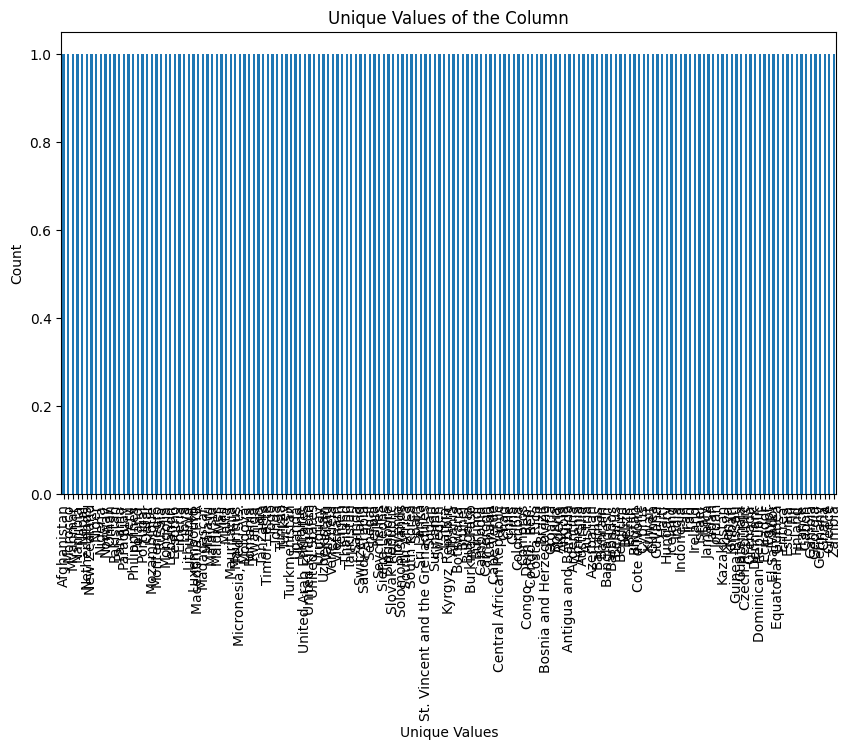

In [ ]:
# View the dimensions of the dataset (number of rows, number of columns)
print("Dimensions of the dataset:", dataset.shape)

# Check the data types of each column
print("\nData types of the columns:")
print(dataset.dtypes)

# Get information about the dataframe, including column names, data types, and non-null counts
print("\nInformation about the dataframe:")
print(dataset.info())

# View statistical details of the numerical columns
print("\nStatistical details of numerical columns:")
print(dataset.describe())

# Describe a column with an object type
print("\nDescription of the column with object type:")
print(dataset['country'].describe())

# Plot the unique values of a column
print("\nUnique values of the column:")
plt.figure(figsize=(10, 6))
dataset['country'].value_counts().plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Unique Values of the Column')
plt.show()

In [ ]:
# Determine the negative values in the "inflation" feature
negative_inflation = dataset[dataset['inflation'] < 0]

# Count the number of negative values of inflation
num_negative_values = len(negative_inflation)

# Print the negative values and the count
print("Negative values in the 'inflation' feature:")
print(negative_inflation)
print("Number of negative values of inflation:", num_negative_values)

Negative values in the 'inflation' feature:
            country  child_mort  exports  health  imports  income  inflation  \
10          Bahamas        13.8     35.0    7.89     43.7   22900     -0.393   
43   Czech Republic         3.4     66.0    7.88     62.9   28300     -1.430   
73          Ireland         4.2    103.0    9.19     86.5   45700     -3.220   
77            Japan         3.2     15.0    9.49     13.6   35800     -1.900   
85           Latvia         7.8     53.7    6.68     55.1   18300     -0.812   
131      Seychelles        14.4     93.8    3.40    108.0   20400     -4.210   
133       Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
135        Slovenia         3.2     64.3    9.41     62.9   28700     -0.987   

     life_expec  total_fer   gdpp  
10         73.8       1.86  28000  
43         77.5       1.51  19800  
73         80.4       2.05  48700  
77         82.8       1.39  44500  
85         73.1       1.36  11300  
131        73.4    

In [ ]:
# Find missing values
missing_values = dataset.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Find duplicated data
duplicated_data = dataset.duplicated()
print("\nDuplicated data in the dataset:")
print(duplicated_data)

# Investigate outliers
c_name = 'income'
outliers = dataset[c_name][(dataset[c_name] - dataset[c_name].mean()).abs() > 3 * dataset[c_name].std()]
print("\nOutliers in column", c_name, ":")
print(outliers)

Missing values in the dataset:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Duplicated data in the dataset:
0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

Outliers in column income :
23      80600
82      75200
91      91700
123    125000
Name: income, dtype: int64


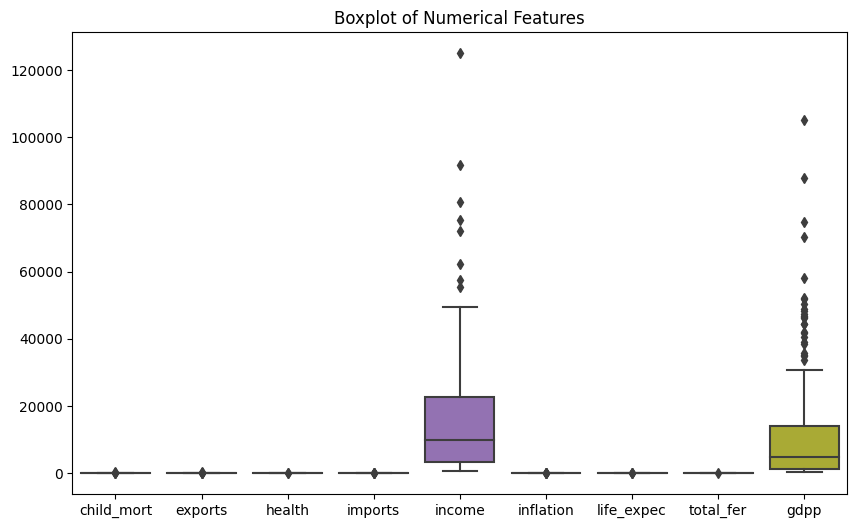

View on the right-skewed shape:
child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

View on the left-skewed shape:
child_mort   -1.450774
exports      -2.445824
health       -0.705746
imports      -1.905276
income       -2.231480
inflation    -5.154049
life_expec    0.970996
total_fer    -0.967092
gdpp         -2.218051
dtype: float64


<ipython-input-17-4e7fa25eea26>:15: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset.skew())
<ipython-input-17-4e7fa25eea26>:17: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(-dataset.skew())


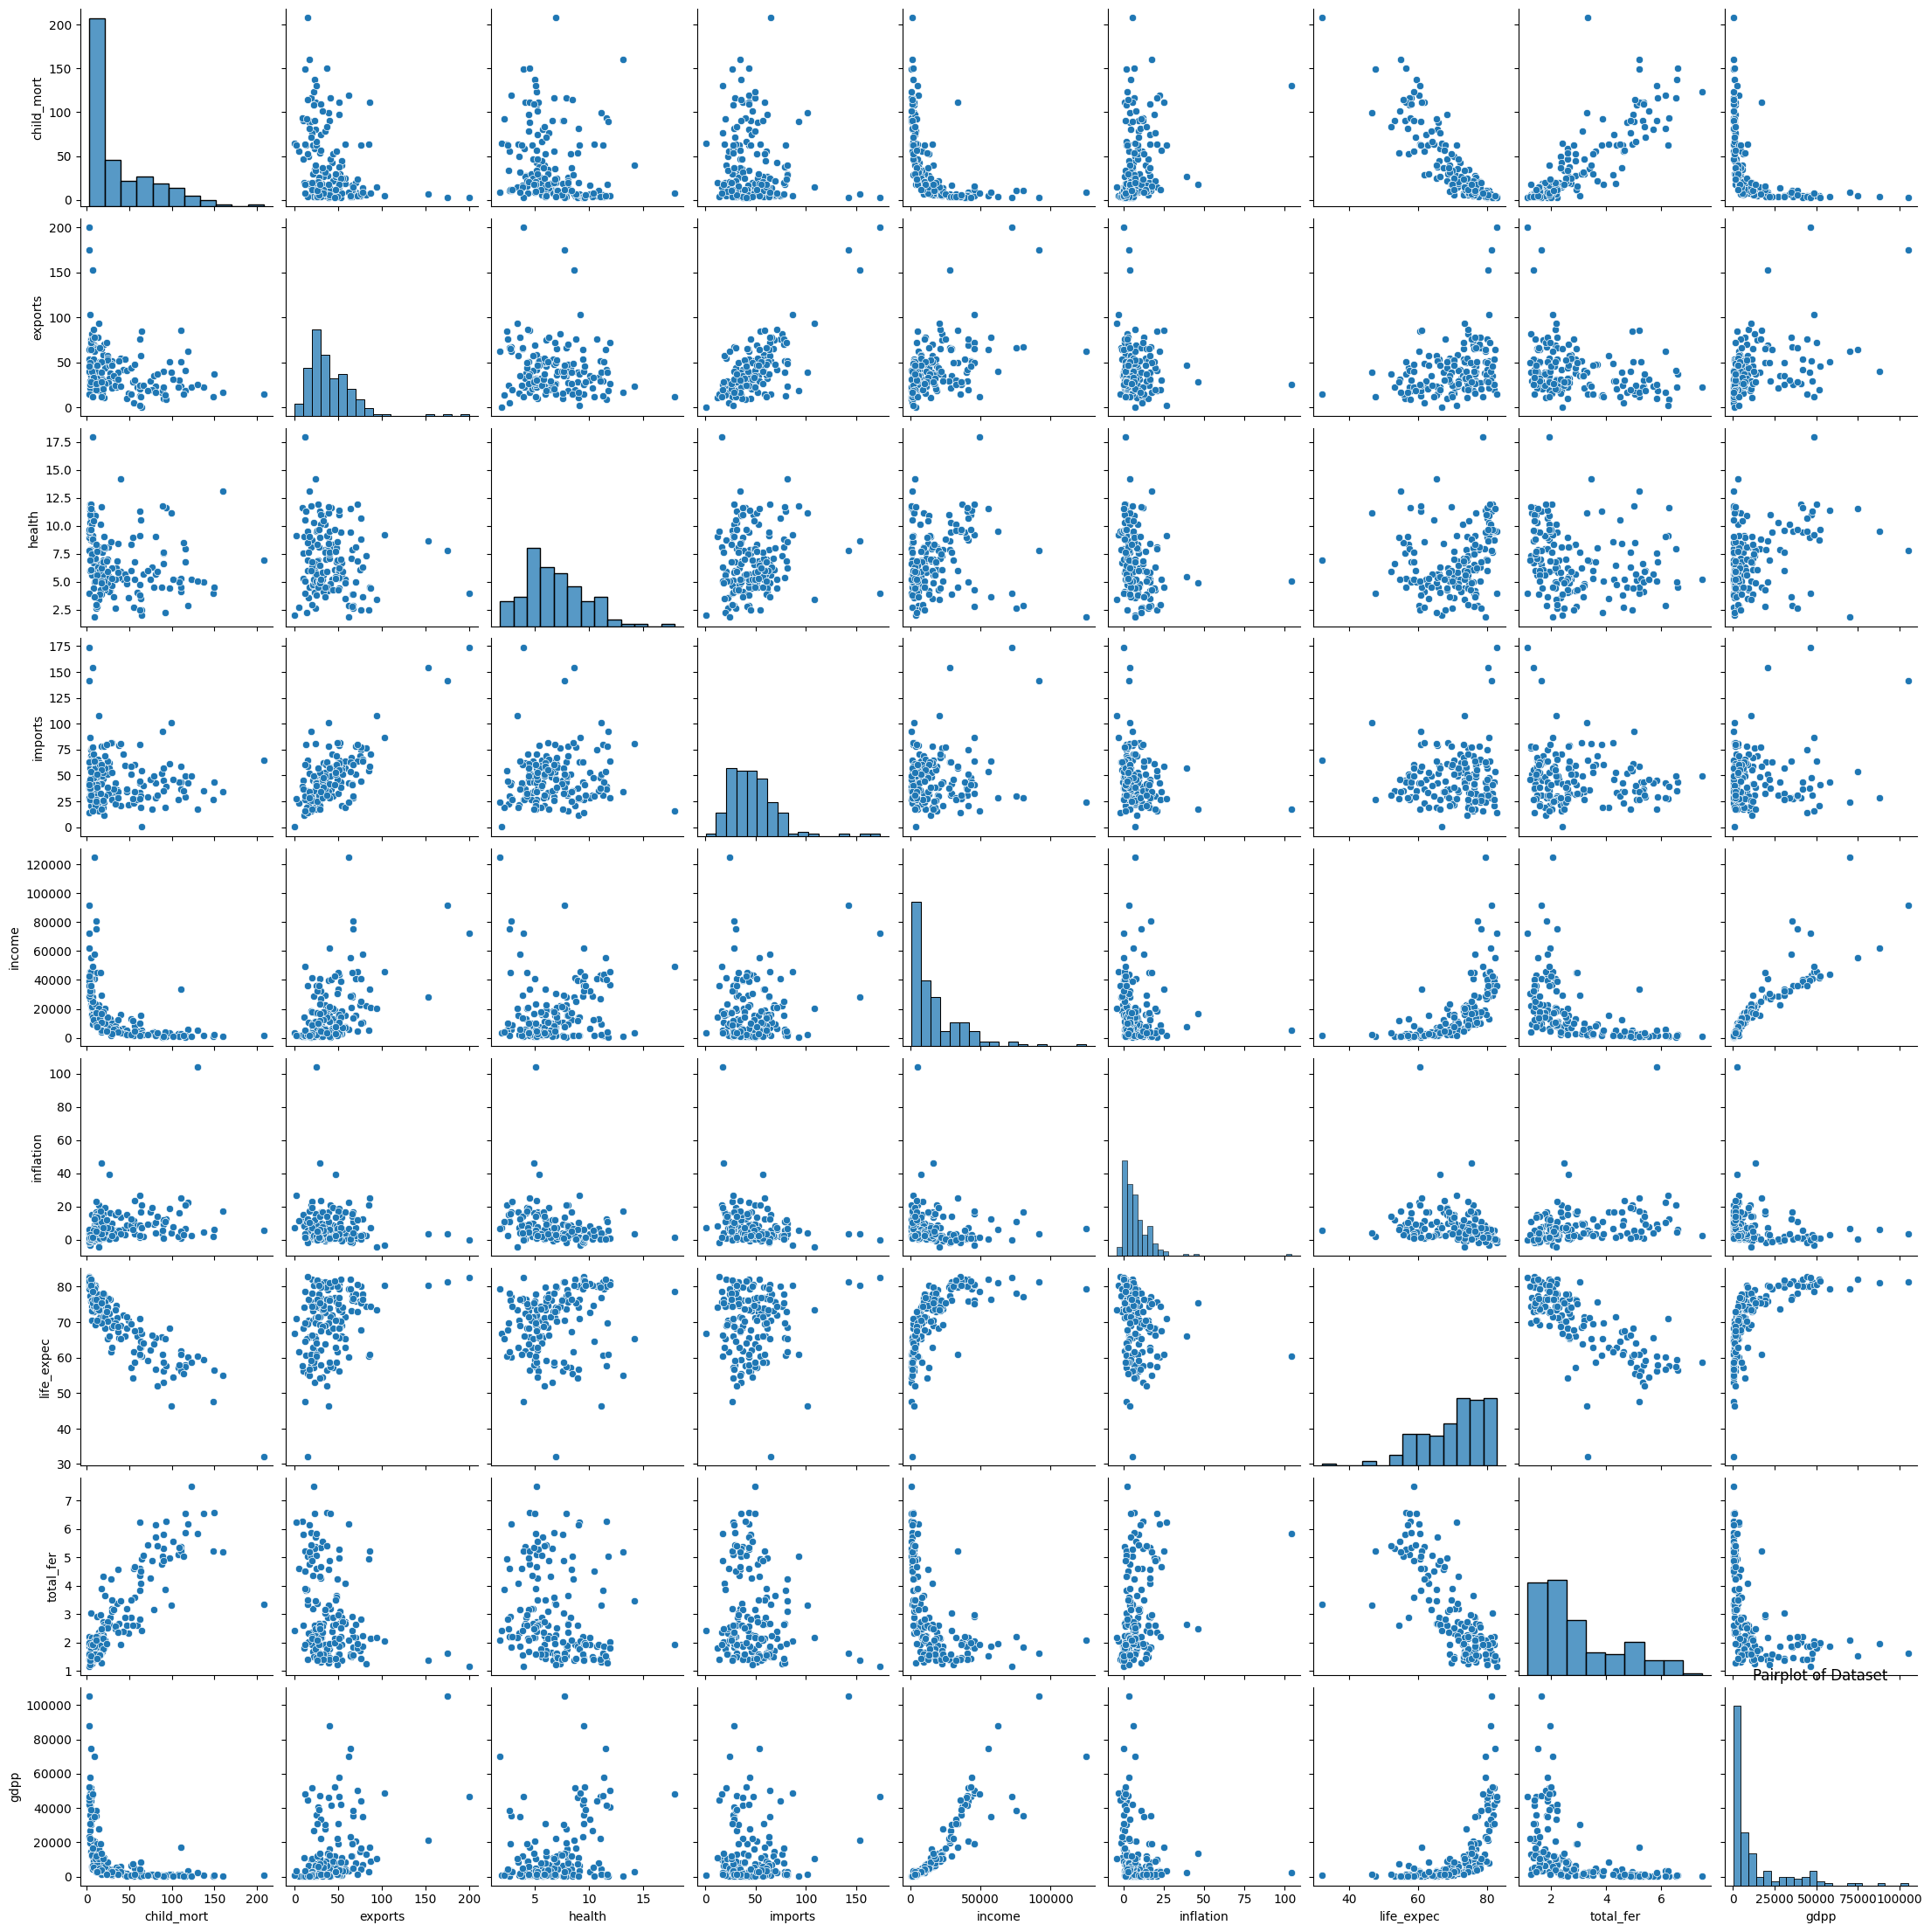

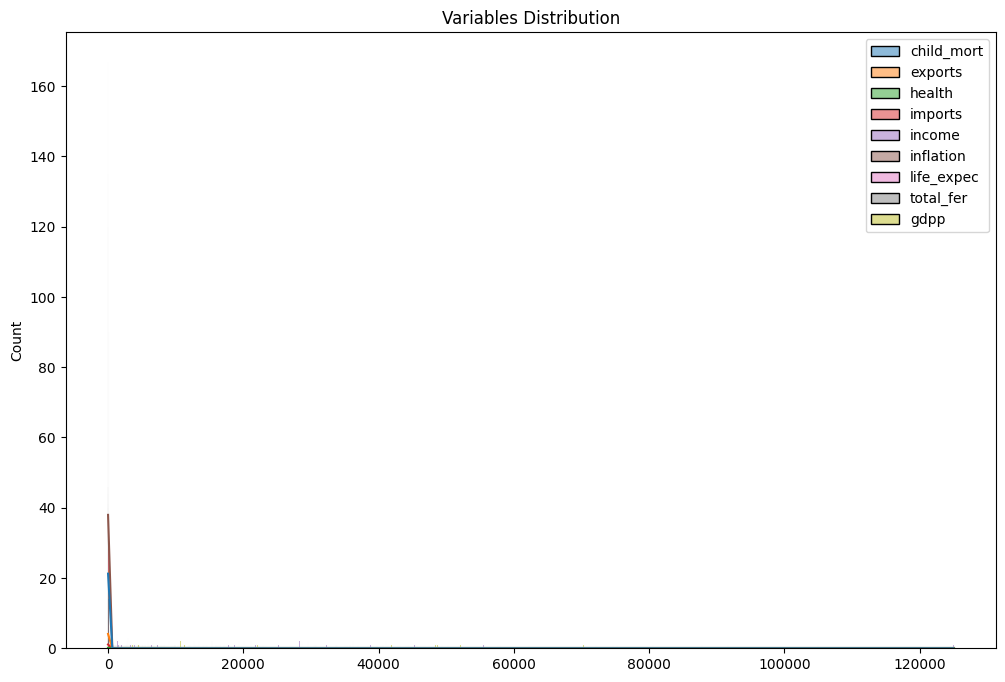

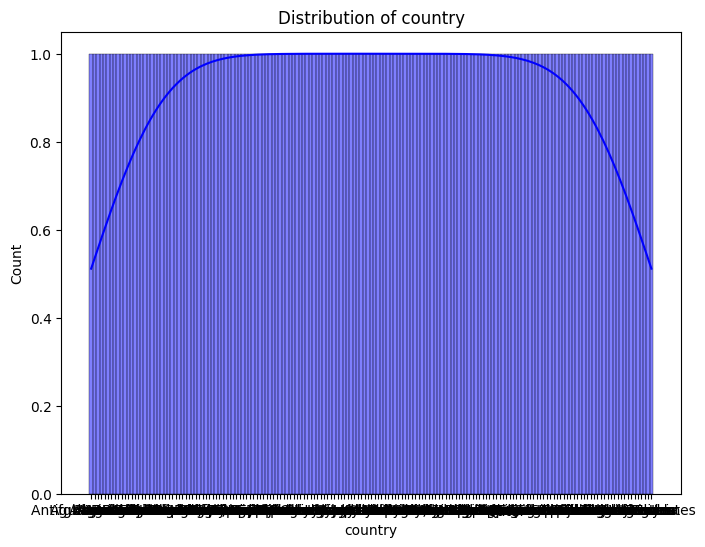

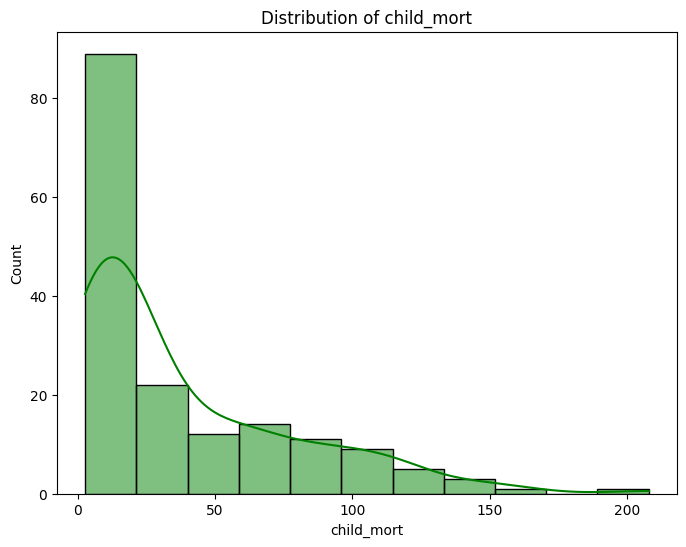

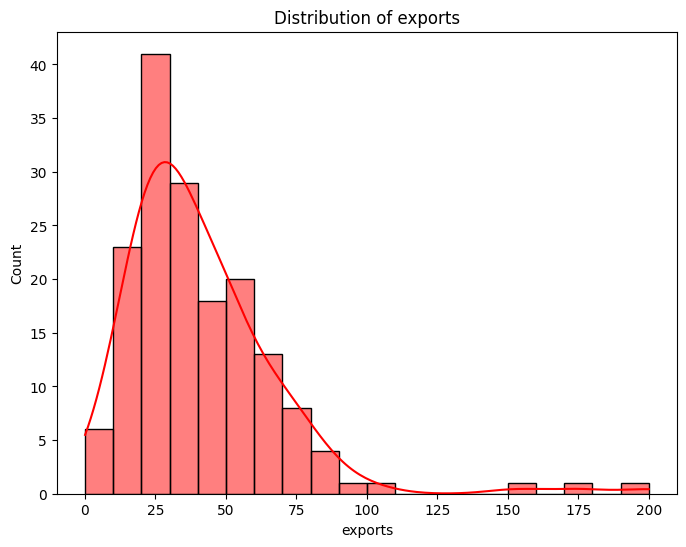

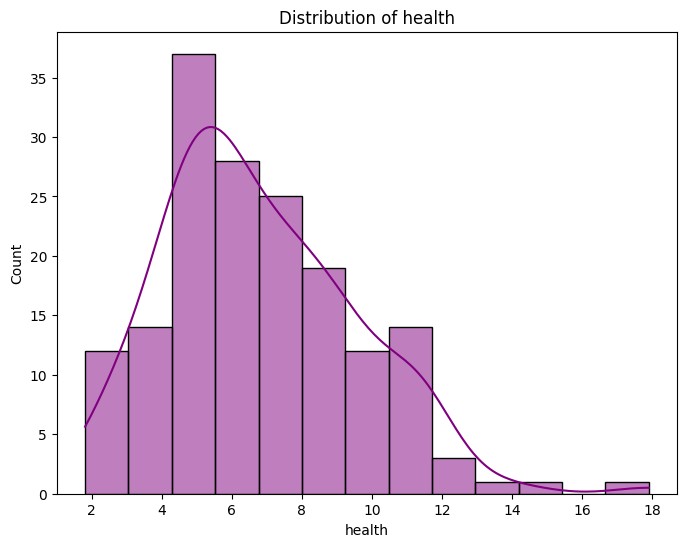

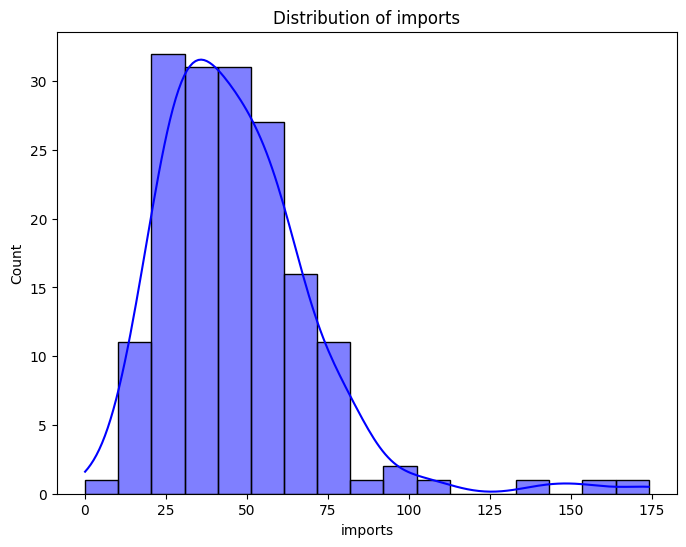

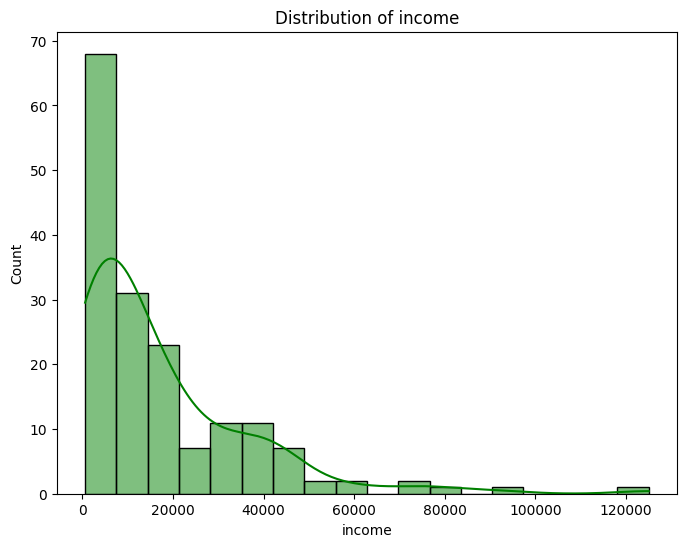

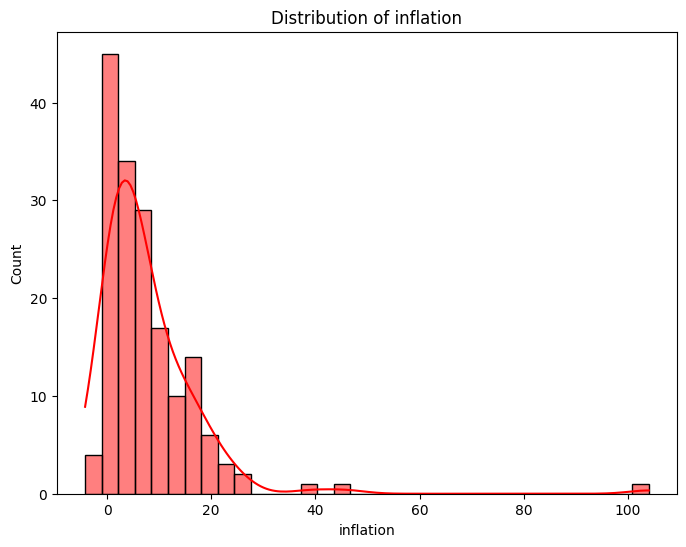

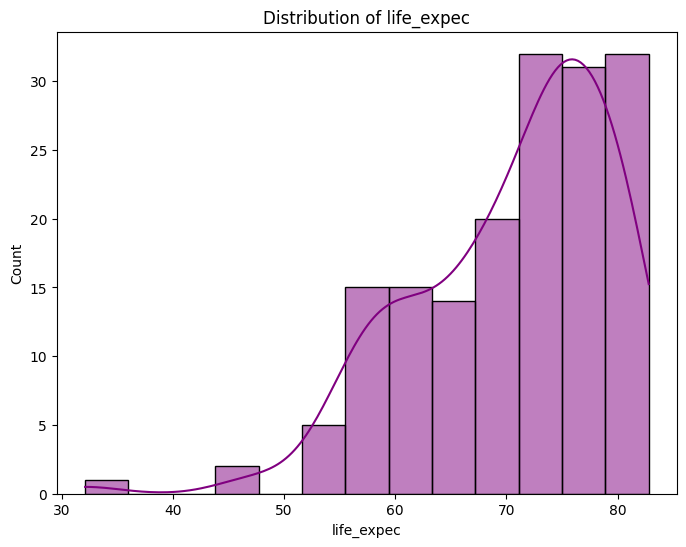

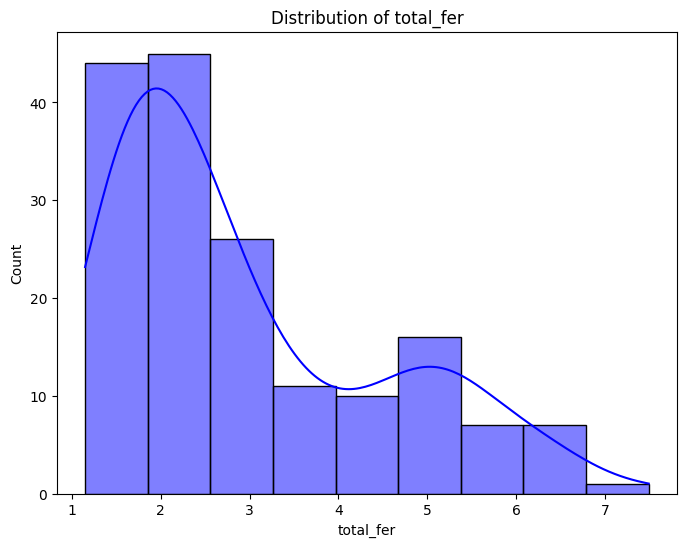

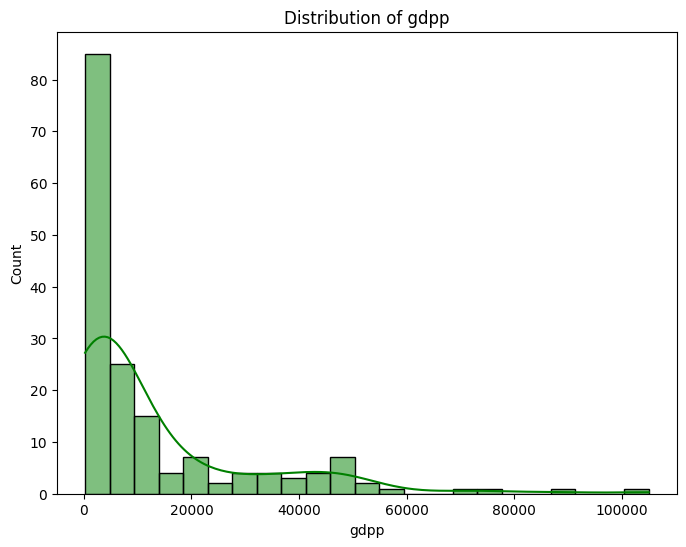

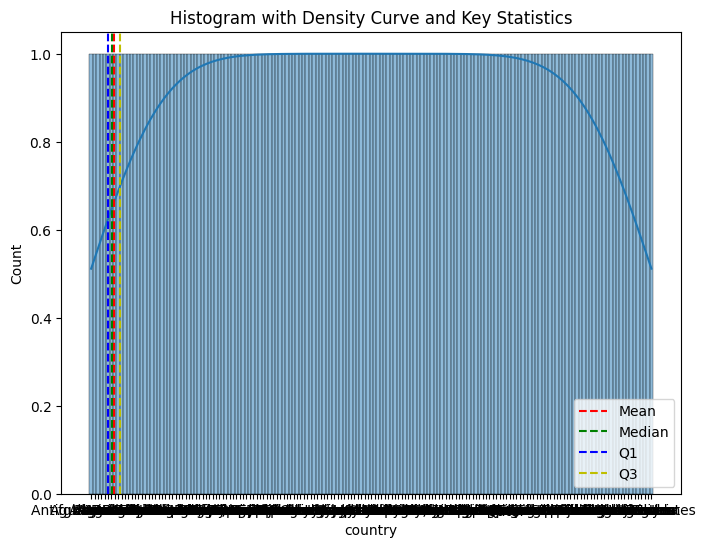

Skewness of the features:
income    2.231480
health    0.705746
dtype: float64


<ipython-input-17-4e7fa25eea26>:61: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = dataset[features_to_check].skew()


<Figure size 1200x800 with 0 Axes>

In [ ]:
import seaborn as sns

# Separate numerical and categorical features
numerical_features = dataset.select_dtypes(include=['float64', 'int64'])
categorical_features = dataset.select_dtypes(include=['object'])

# Draw boxplot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_features)
plt.title('Boxplot of Numerical Features')
plt.show()

# View on the right-skewed shape and left-skewed shape
print("View on the right-skewed shape:")
print(dataset.skew())
print("\nView on the left-skewed shape:")
print(-dataset.skew())

# Draw pairplot for noises
sns.pairplot(dataset)
plt.title('Pairplot of Dataset')
plt.show()

# Exploratory Data Analysis (EDA)
# Check variables distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=dataset, kde=True)
plt.title('Variables Distribution')
plt.show()

# Define colors for each feature
colors = ['blue', 'green', 'red', 'purple']  # Add more colors as needed

# Loop through each column and plot distribution
for i, column in enumerate(dataset.columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dataset[column], kde=True, color=colors[i % len(colors)])
    plt.title(f'Distribution of {column}')
    plt.show()

# Plot histogram with density curve and add vertical lines for mean, median, Q1, and Q3
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset['country'], kde=True)
plt.axvline(dataset['health'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(dataset['health'].median(), color='g', linestyle='--', label='Median')
plt.axvline(dataset['health'].quantile(0.25), color='b', linestyle='--', label='Q1')
plt.axvline(dataset['health'].quantile(0.75), color='y', linestyle='--', label='Q3')
plt.legend()
plt.title('Histogram with Density Curve and Key Statistics')
plt.show()

# Set title of subplot
plt.figure(figsize=(12, 8))
plt.suptitle('Variables Distribution')

# Add overall title and adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Check variables skewness
features_to_check = ['country', 'income', 'health']  # Add more features to check
skewness = dataset[features_to_check].skew()
print("Skewness of the features:")
print(skewness)


In [ ]:
# Create an empty DataFrame to store the results
skewness_results = pd.DataFrame(columns=['income', 'Skewness'])

# Loop over each feature and calculate its skewness
for column in dataset.columns:
    skewness = dataset['income'].skew()
    skewness_results = skewness_results.append({'income': column, 'Skewness': skewness}, ignore_index=True)

# Print the skewness results
print(skewness_results)

       income  Skewness
0     country   2.23148
1  child_mort   2.23148
2     exports   2.23148
3      health   2.23148
4     imports   2.23148
5      income   2.23148
6   inflation   2.23148
7  life_expec   2.23148
8   total_fer   2.23148
9        gdpp   2.23148


<ipython-input-20-08175ec3c592>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_results = skewness_results.append({'income': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-20-08175ec3c592>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_results = skewness_results.append({'income': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-20-08175ec3c592>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_results = skewness_results.append({'income': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-20-08175ec3c592>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness

In [ ]:
for column in dataset.columns:
    skewness = dataset['income'].skew()
    skewness_direction = "Right-skewed" if skewness > 0 else "Left-skewed" if skewness < 0 else "Symmetric"
    print(f"Skewness of '{column}': {skewness_direction}")

Skewness of 'country': Right-skewed
Skewness of 'child_mort': Right-skewed
Skewness of 'exports': Right-skewed
Skewness of 'health': Right-skewed
Skewness of 'imports': Right-skewed
Skewness of 'income': Right-skewed
Skewness of 'inflation': Right-skewed
Skewness of 'life_expec': Right-skewed
Skewness of 'total_fer': Right-skewed
Skewness of 'gdpp': Right-skewed


Summary Statistics:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.7

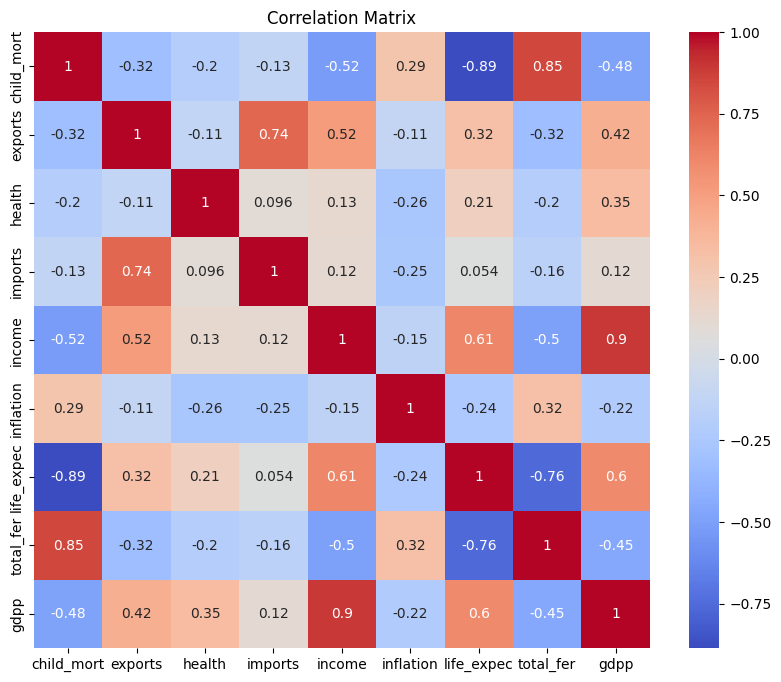

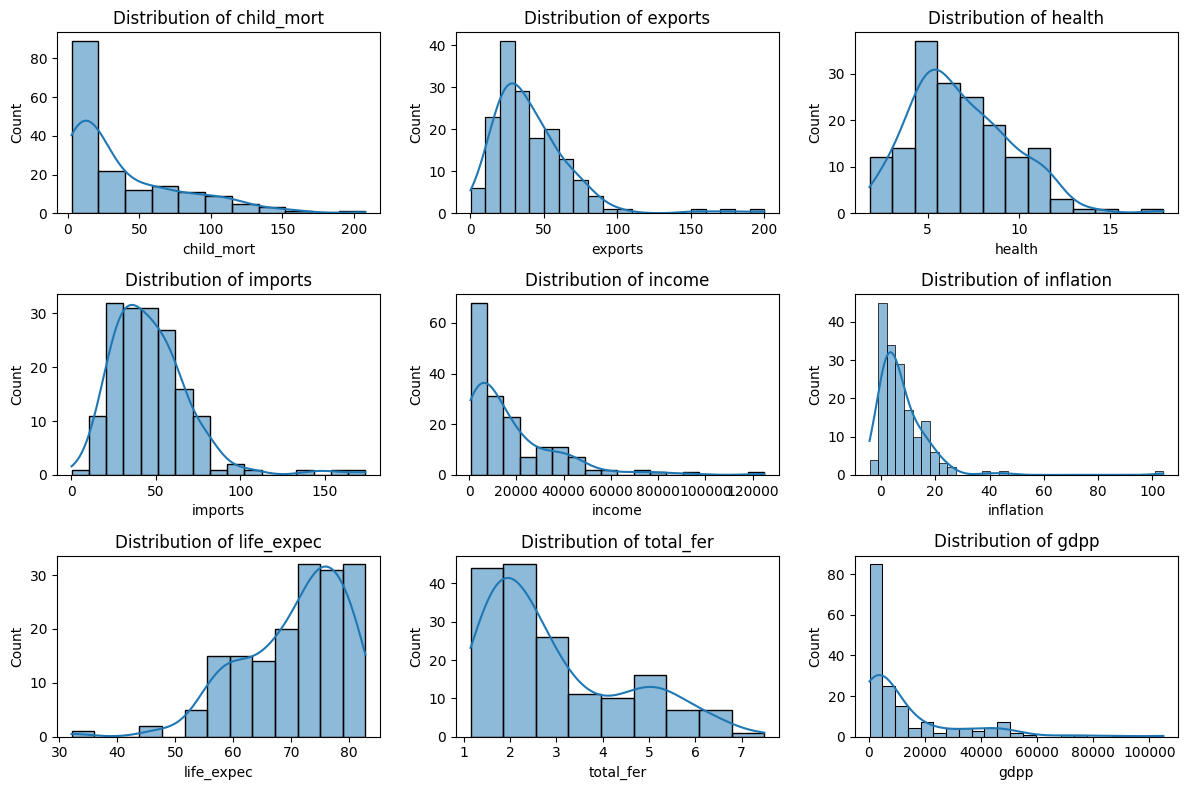

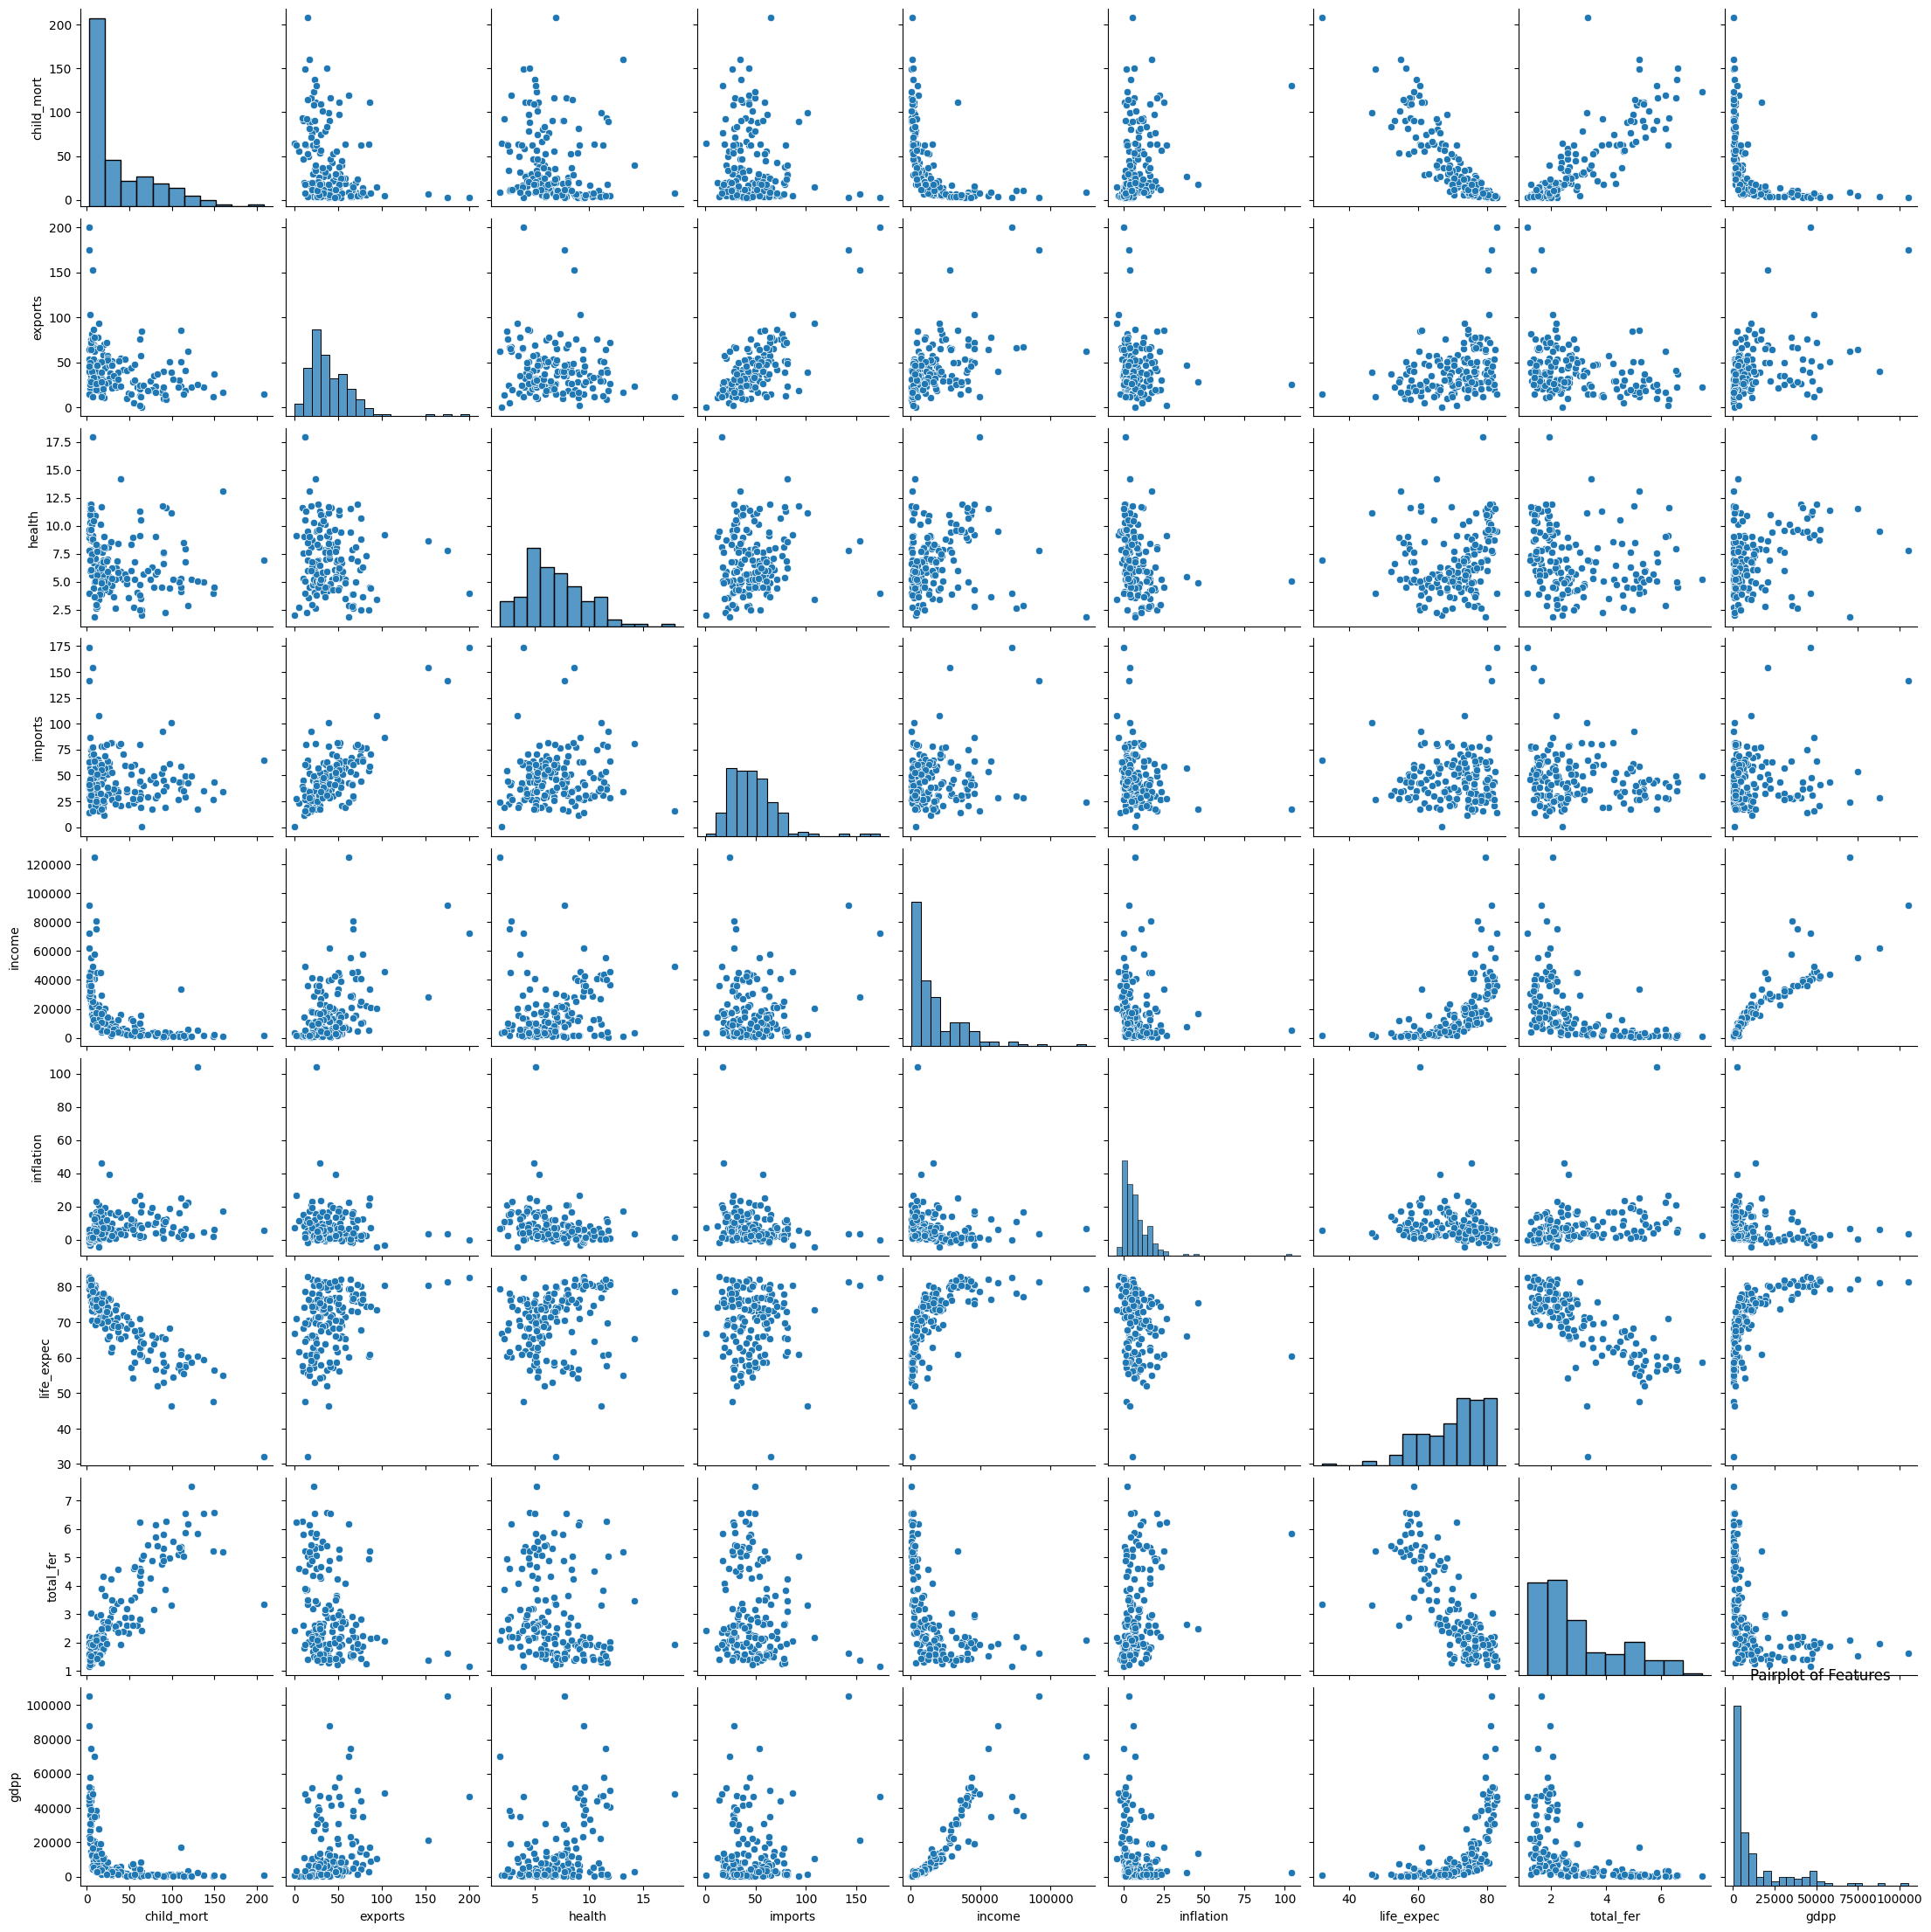

In [ ]:
# Summary statistics of the features
summary_stats = dataset[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
                         'life_expec', 'total_fer', 'gdpp']].describe()
print("Summary Statistics:")
print(summary_stats)

# Correlation matrix
corr_matrix = dataset[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
                       'life_expec', 'total_fer', 'gdpp']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Distribution of features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
                             'life_expec', 'total_fer', 'gdpp']):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=dataset, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Scatter plot of features
sns.pairplot(data=dataset, vars=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
                                'life_expec', 'total_fer', 'gdpp'])
plt.title('Pairplot of Features')
plt.show()


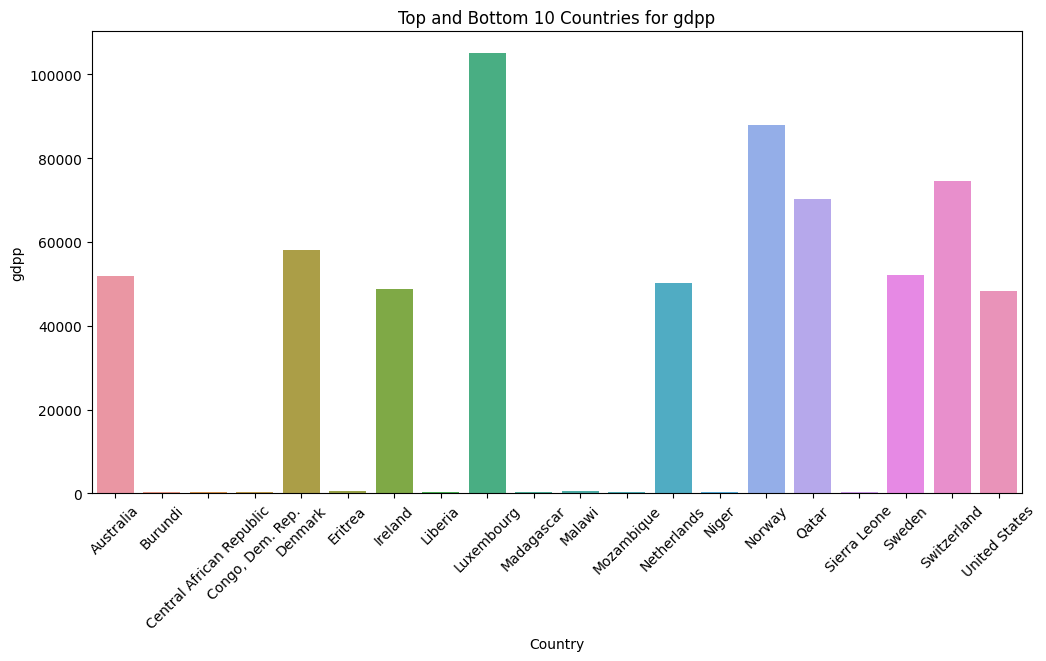

In [ ]:
# Specify the parameter/column to analyze (e.g., 'gdpp')
parameter = 'gdpp'

# Get the top and bottom 10 countries based on the specified parameter
top_10_countries = dataset.nlargest(10, parameter)
bottom_10_countries = dataset.nsmallest(10, parameter)

# Create a boolean mask for the top and bottom 10 countries
top_bottom_mask = dataset['country'].isin(top_10_countries['country']) | dataset['country'].isin(bottom_10_countries['country'])

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=dataset[top_bottom_mask], x='country', y=parameter)
plt.xlabel('Country')
plt.ylabel(parameter)
plt.title(f'Top and Bottom 10 Countries for {parameter}')
plt.xticks(rotation=45)

# Display the plot
plt.show()


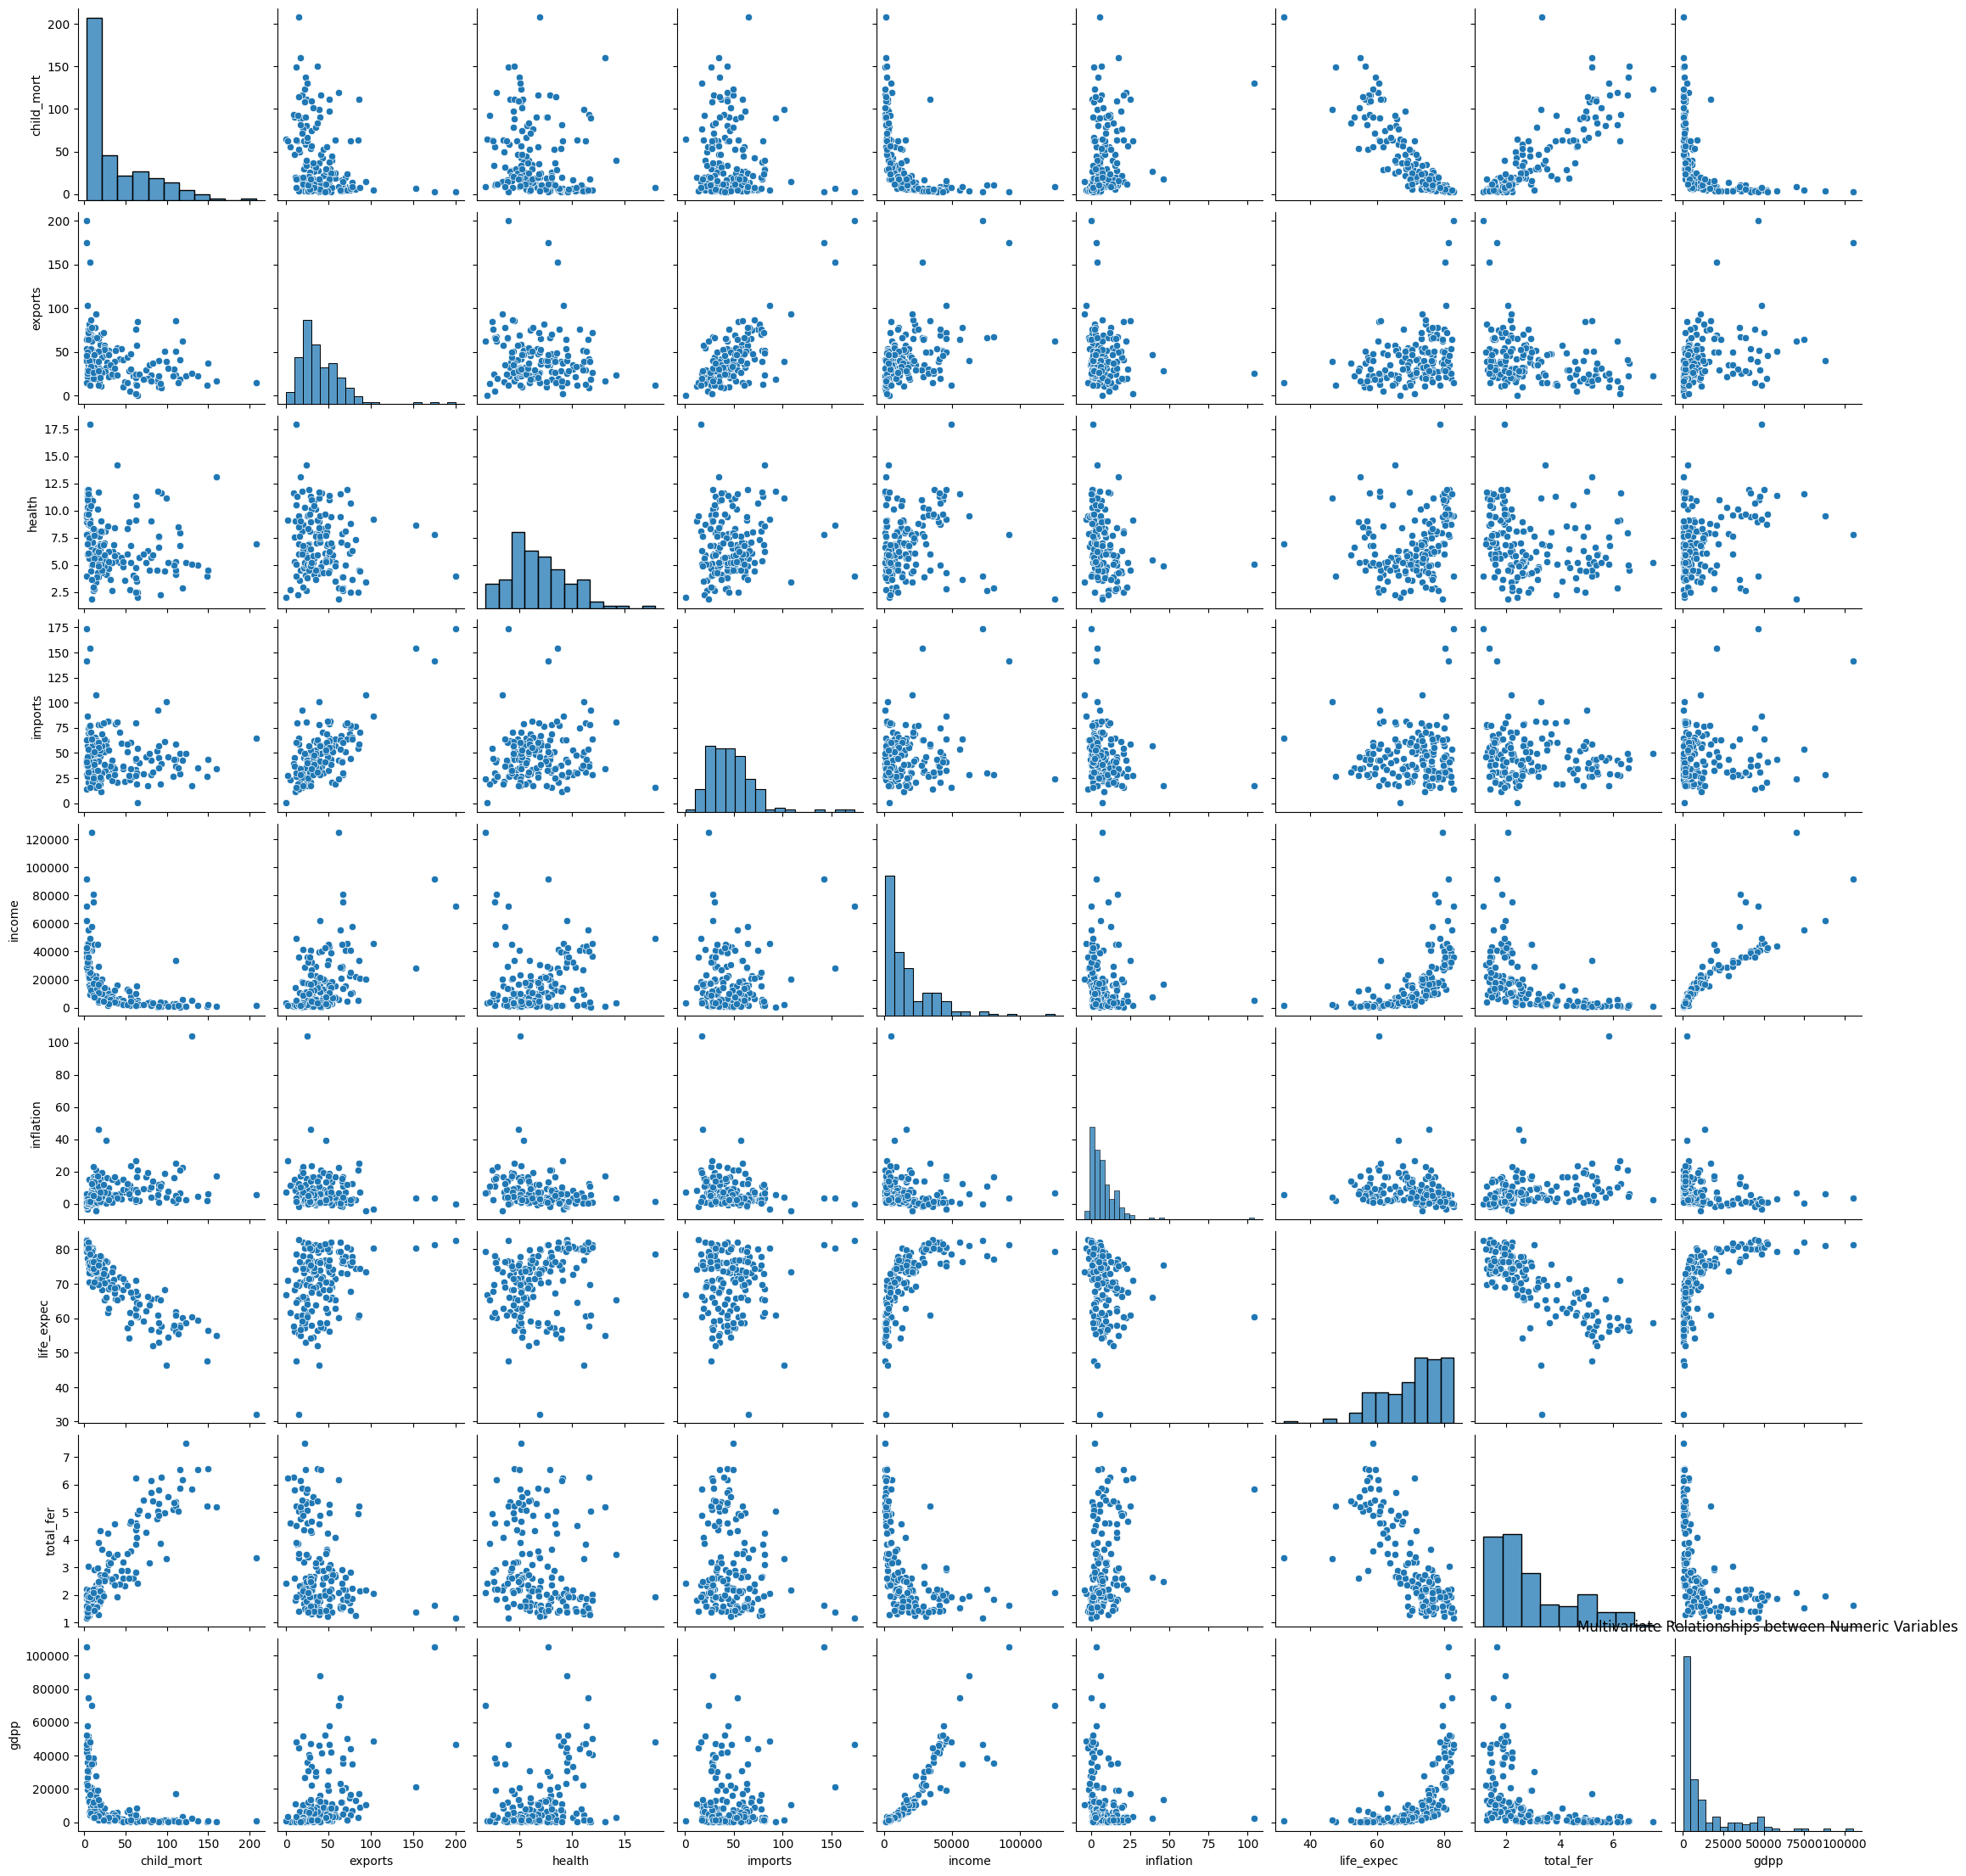

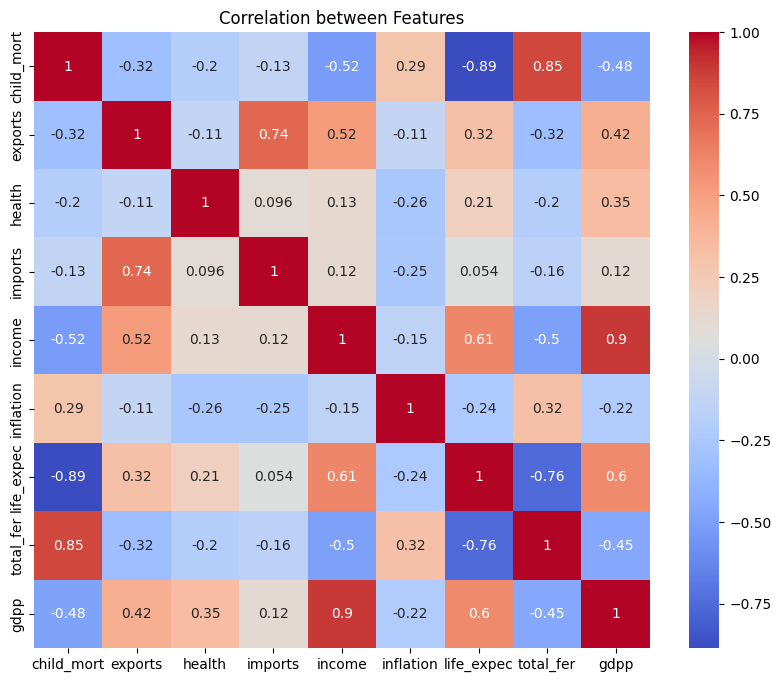

In [ ]:
from sklearn.preprocessing import StandardScaler
# Select the numeric variables for multivariate analysis
numeric_vars = dataset.select_dtypes(include=np.number)

# Multivariate relationships between numeric variables
sns.pairplot(data=numeric_vars)
plt.title('Multivariate Relationships between Numeric Variables')
plt.show()

# Correlation between the features
corr_matrix = numeric_vars.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between Features')
plt.show()

# Standardize the numeric variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_vars)

# Create PCA object and fit the scaled data
pca = PCA()
pca.fit(scaled_data)

# Transform the data to its principal components
principal_components = pca.transform(scaled_data)


In [ ]:
# Select the numeric variables for PCA analysis
numeric_vars = dataset.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_vars)

# Create PCA object and fit the scaled data
pca = PCA()
pca.fit(scaled_data)

# Get the number of principal components
num_components = pca.n_components_

# Print the number of principal components
print("Number of Principal Components:", num_components)

# Print the explained variance of each principal component
print("\nExplained Variance of Each Principal Component:")
print(pca.explained_variance_)

# Print the total variance explained by all the principal components
total_variance = pca.explained_variance_.sum()
print("\nTotal Variance Explained by All Principal Components:", total_variance)

# Print the explained variance ratio of each principal component
print("\nExplained Variance Ratio of Each Principal Component:")
print(pca.explained_variance_ratio_)


Number of Principal Components: 9

Explained Variance of Each Principal Component:
[4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.1141221  0.08884738 0.06727787]

Total Variance Explained by All Principal Components: 9.05421686746988

Explained Variance Ratio of Each Principal Component:
[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


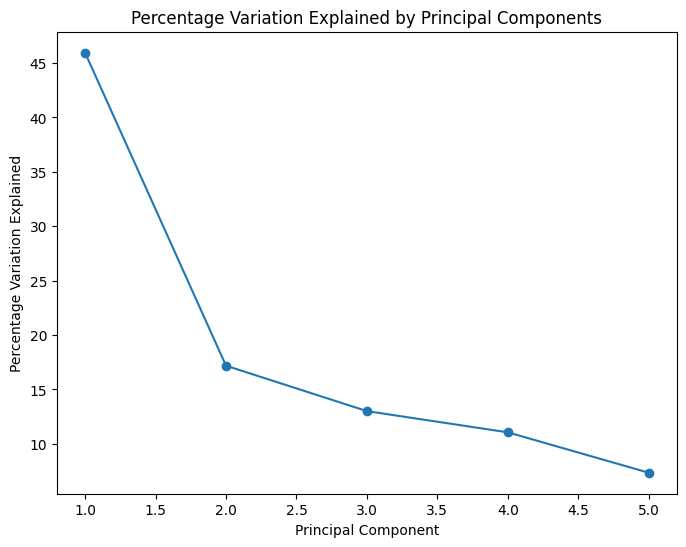

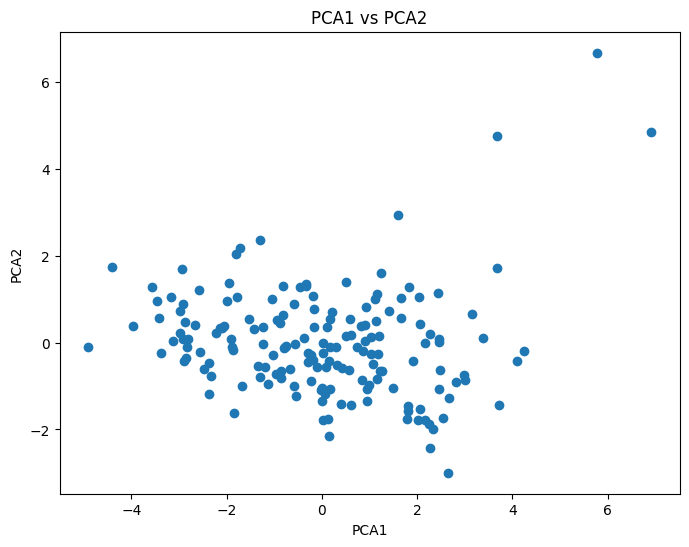

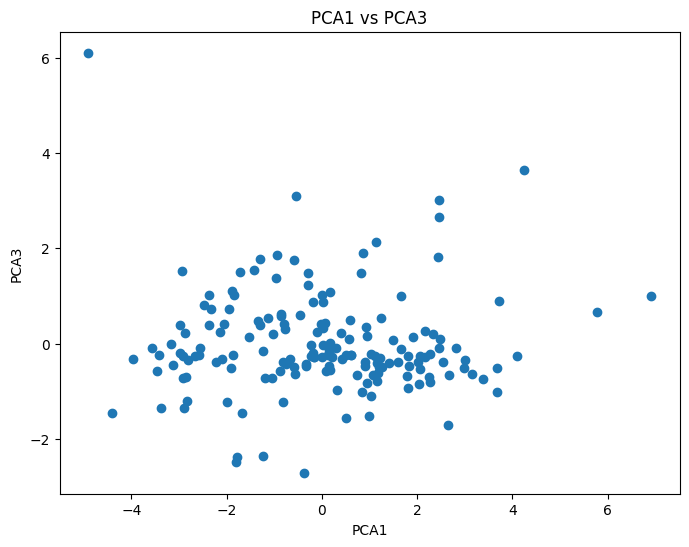

        PC1       PC2       PC3       PC4       PC5
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475
3 -2.932423  1.695555  1.525044  0.839625 -0.273209
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007


In [ ]:
# Select the numeric variables for PCA analysis
numeric_vars = dataset.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_vars)

# Create PCA object with 5 components
pca = PCA(n_components=5)

# Fit and transform the scaled data
transformed_data = pca.fit_transform(scaled_data)

# Calculate percentage variation
percentage_variation = pca.explained_variance_ratio_ * 100

# Variance explained by each dimension
variance_explained = pca.explained_variance_

# Plot PCA
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(percentage_variation) + 1), percentage_variation, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Variation Explained')
plt.title('Percentage Variation Explained by Principal Components')
plt.show()

# Plot PCA1 vs PCA2
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')
plt.show()

# Plot PCA1 vs PCA3
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 2])
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.title('PCA1 vs PCA3')
plt.show()

# Principal Component Data Decomposition
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
decomposed_data = pd.DataFrame(data=transformed_data, columns=columns)

# Display the decomposed data DataFrame
print(decomposed_data.head())
